In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2023-01-31 16:16:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0s      

2023-01-31 16:16:39 (210 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [ ]:
df=pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


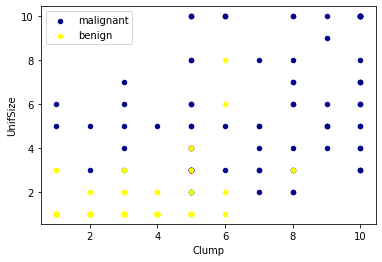

In [ ]:
ax=df[df["Class"]==4][0:80].plot(kind="scatter",x="Clump", y="UnifSize",color="DarkBlue", label="malignant");
df[df["Class"]==2][0:80].plot(kind="scatter", x="Clump",y="UnifSize", color="Yellow",label="benign",ax=ax);
plt.show()

In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
#on obervation we see that BareNuc has some values which give it the object datatype. We have to resolve it.

In [ ]:
df=df[pd.to_numeric(df["BareNuc"],errors='coerce').notnull()]
df["BareNuc"]=df['BareNuc'].astype("int")
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
X_val=df.iloc[:,1:-1].values
X_val[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
Y_val=df.iloc[:,-1].values
Y_val[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_val,Y_val,test_size=0.2,random_state=2)
print("Size of Training Data: ",X_train.shape,y_train.shape)
print("Size of Testing Data: ",X_test.shape,y_test.shape)

Size of Training Data:  (546, 9) (546,)
Size of Testing Data:  (137, 9) (137,)


In [ ]:
from sklearn import svm
svm1=svm.SVC(kernel="rbf")
svm1.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svm1.predict(X_test)
y_pred[0:5]

array([4, 4, 2, 4, 2])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[79  4]
 [ 1 53]]


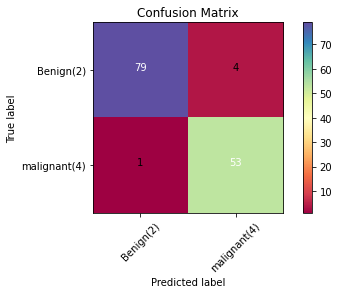

In [ ]:
cnfm=confusion_matrix(y_test,y_pred,labels=[2,4])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnfm,classes=["Benign(2)","malignant(4)"],normalize=False,title="Confusion Matrix")

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average="weighted")

0.9636609875739336

In [ ]:
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test,y_pred,pos_label=2))
print(jaccard_score(y_test,y_pred,pos_label=4))

0.9404761904761905
0.9137931034482759


In [ ]:
#simultaneously testing on Sigmoid and Linear Kernel

In [ ]:
svm2=svm.SVC(kernel="linear")
svm2.fit(X_train,y_train)
ypred2=svm2.predict(X_test)
print("f1_scores: ",f1_score(y_test,y_pred,average="weighted"))
print("Jaccard Score: ",jaccard_score(y_test,ypred2,pos_label=2))

f1_scores:  0.9636609875739336
Jaccard Score:  0.9186046511627907


In [ ]:
svm2=svm.SVC(kernel="sigmoid")
svm2.fit(X_train,y_train)
ypred2=svm2.predict(X_test)
print("f1_scores: ",f1_score(y_test,y_pred,average="weighted"))
print("Jaccard Score: ",jaccard_score(y_test,ypred2,pos_label=2))

f1_scores:  0.9636609875739336
Jaccard Score:  0.39416058394160586
Jaccard Score:  0.0


In [ ]:
#sigmoid kernel function tends to give a very low jaccard score